# 🩺 Diabetes Prediction using Decision Tree
# Author: Daisy
# Platform: GitHub | Kaggle


# =====================================================
# 1. INTRODUCTION
# =====================================================
# Diabetes is a chronic medical condition that occurs when the body is unable
# to properly regulate blood sugar levels. Early detection of diabetes is
# crucial to prevent severe complications.
#
# This notebook performs:
# - Exploratory Data Analysis (EDA)
# - Data preprocessing
# - Train-test split
# - Decision Tree classification
# - Model evaluation

In [55]:
# -------------------------------
# 2. Import Required Libraries
# -------------------------------
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report

In [56]:
# =====================================================
# 3. DATASET DESCRIPTION
# =====================================================
# Dataset: PIMA Indians Diabetes Dataset
# Target Column: Outcome (0 = Non-diabetic, 1 = Diabetic)
# Features include glucose level, blood pressure, BMI, age, etc.
df = pd.read_csv("/content/drive/MyDrive/AI_training/diabetes.csv")

print("Dataset Shape:", df.shape)
print(df.head())


Dataset Shape: (768, 9)
   Pregnancies  Glucose  BloodPressure  SkinThickness  Insulin   BMI  \
0            6      148             72             35        0  33.6   
1            1       85             66             29        0  26.6   
2            8      183             64              0        0  23.3   
3            1       89             66             23       94  28.1   
4            0      137             40             35      168  43.1   

   DiabetesPedigreeFunction  Age  Outcome  
0                     0.627   50        1  
1                     0.351   31        0  
2                     0.672   32        1  
3                     0.167   21        0  
4                     2.288   33        1  


In [57]:

# =====================================================
# 4. EXPLORATORY DATA ANALYSIS (EDA)
# =====================================================
print("\nDataset Info:")
print(df.info())

print("\nStatistical Summary:")
print(df.describe())


Dataset Info:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 768 entries, 0 to 767
Data columns (total 9 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Pregnancies               768 non-null    int64  
 1   Glucose                   768 non-null    int64  
 2   BloodPressure             768 non-null    int64  
 3   SkinThickness             768 non-null    int64  
 4   Insulin                   768 non-null    int64  
 5   BMI                       768 non-null    float64
 6   DiabetesPedigreeFunction  768 non-null    float64
 7   Age                       768 non-null    int64  
 8   Outcome                   768 non-null    int64  
dtypes: float64(2), int64(7)
memory usage: 54.1 KB
None

Statistical Summary:
       Pregnancies     Glucose  BloodPressure  SkinThickness     Insulin  \
count   768.000000  768.000000     768.000000     768.000000  768.000000   
mean      3.845052  120.894531      69.105469 

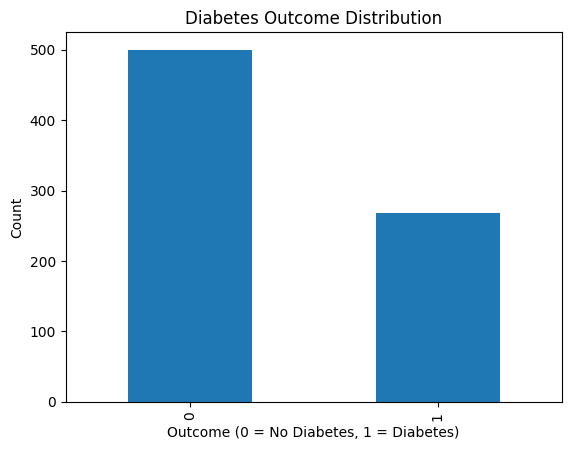

In [58]:
# -------------------------------
# Outcome Distribution
# -------------------------------
plt.figure()
df['Outcome'].value_counts().plot(kind='bar')
plt.xlabel('Outcome (0 = No Diabetes, 1 = Diabetes)')
plt.ylabel('Count')
plt.title('Diabetes Outcome Distribution')
plt.show()

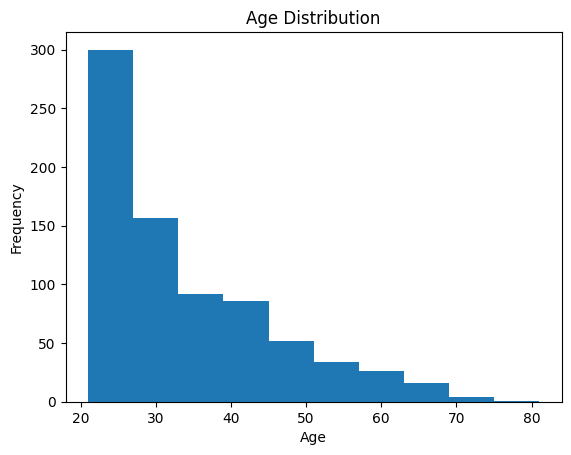

In [59]:
# -------------------------------
# Age Distribution
# -------------------------------
plt.figure()
plt.hist(df['Age'])
plt.xlabel('Age')
plt.ylabel('Frequency')
plt.title('Age Distribution')
plt.show()

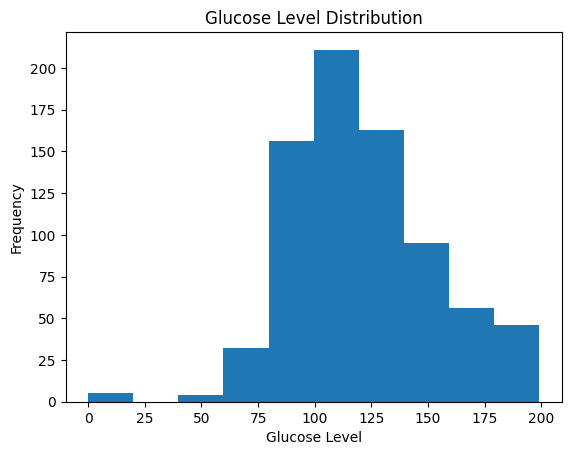

In [60]:
# -------------------------------
# Glucose Distribution
# -------------------------------
plt.figure()
plt.hist(df['Glucose'])
plt.xlabel('Glucose Level')
plt.ylabel('Frequency')
plt.title('Glucose Level Distribution')
plt.show()

<Figure size 640x480 with 0 Axes>

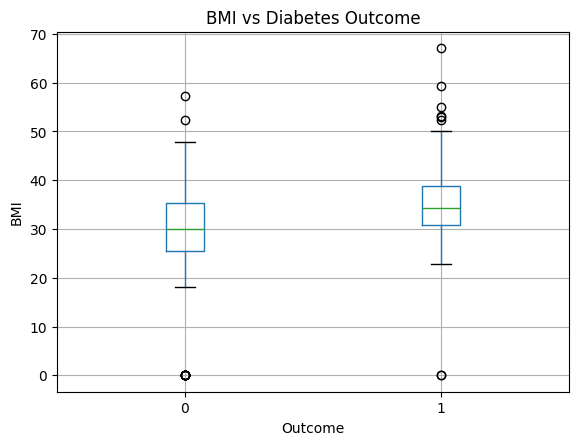

In [61]:
# -------------------------------
# BMI vs Outcome
# -------------------------------
plt.figure()
df.boxplot(column='BMI', by='Outcome')
plt.xlabel('Outcome')
plt.ylabel('BMI')
plt.title('BMI vs Diabetes Outcome')
plt.suptitle('')
plt.show()

In [62]:
# =====================================================
# 5. DATA PREPROCESSING
# =====================================================


# Separate features and target
X = df.drop('Outcome', axis=1)
y = df['Outcome']


print("Feature Shape:", X.shape)
print("Target Shape:", y.shape)

Feature Shape: (768, 8)
Target Shape: (768,)


In [63]:
# =====================================================
# 6. TRAIN-TEST SPLIT
# =====================================================


X_train, X_test, y_train, y_test = train_test_split(
X, y, test_size=0.2, random_state=42
)


print("Training Set Size:", X_train.shape)
print("Testing Set Size:", X_test.shape)

Training Set Size: (614, 8)
Testing Set Size: (154, 8)


In [64]:
# =====================================================
# 7. DECISION TREE MODEL
# =====================================================


# Initialize Decision Tree Classifier
model = DecisionTreeClassifier(random_state=42)


# Train the model
model.fit(X_train, y_train)


# Predictions
y_pred = model.predict(X_test)

Model Accuracy: 0.7467532467532467

Classification Report:
              precision    recall  f1-score   support

           0       0.83      0.76      0.79        99
           1       0.62      0.73      0.67        55

    accuracy                           0.75       154
   macro avg       0.73      0.74      0.73       154
weighted avg       0.76      0.75      0.75       154



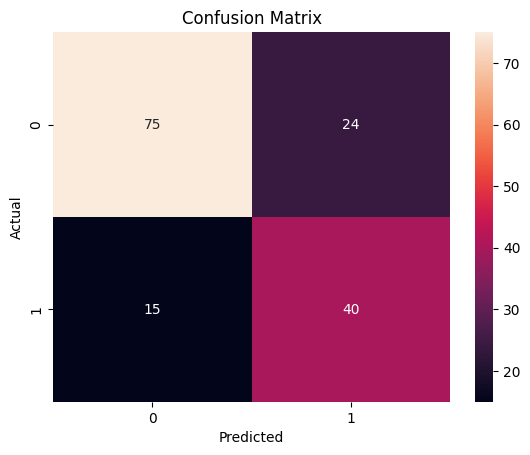

In [65]:
# =====================================================
# 8. MODEL EVALUATION
# =====================================================


# Accuracy
accuracy = accuracy_score(y_test, y_pred)
print("Model Accuracy:", accuracy)


# Classification Report
print("\nClassification Report:")
print(classification_report(y_test, y_pred))


# Confusion Matrix
plt.figure()
sns.heatmap(confusion_matrix(y_test, y_pred), annot=True, fmt='d')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix')
plt.show()

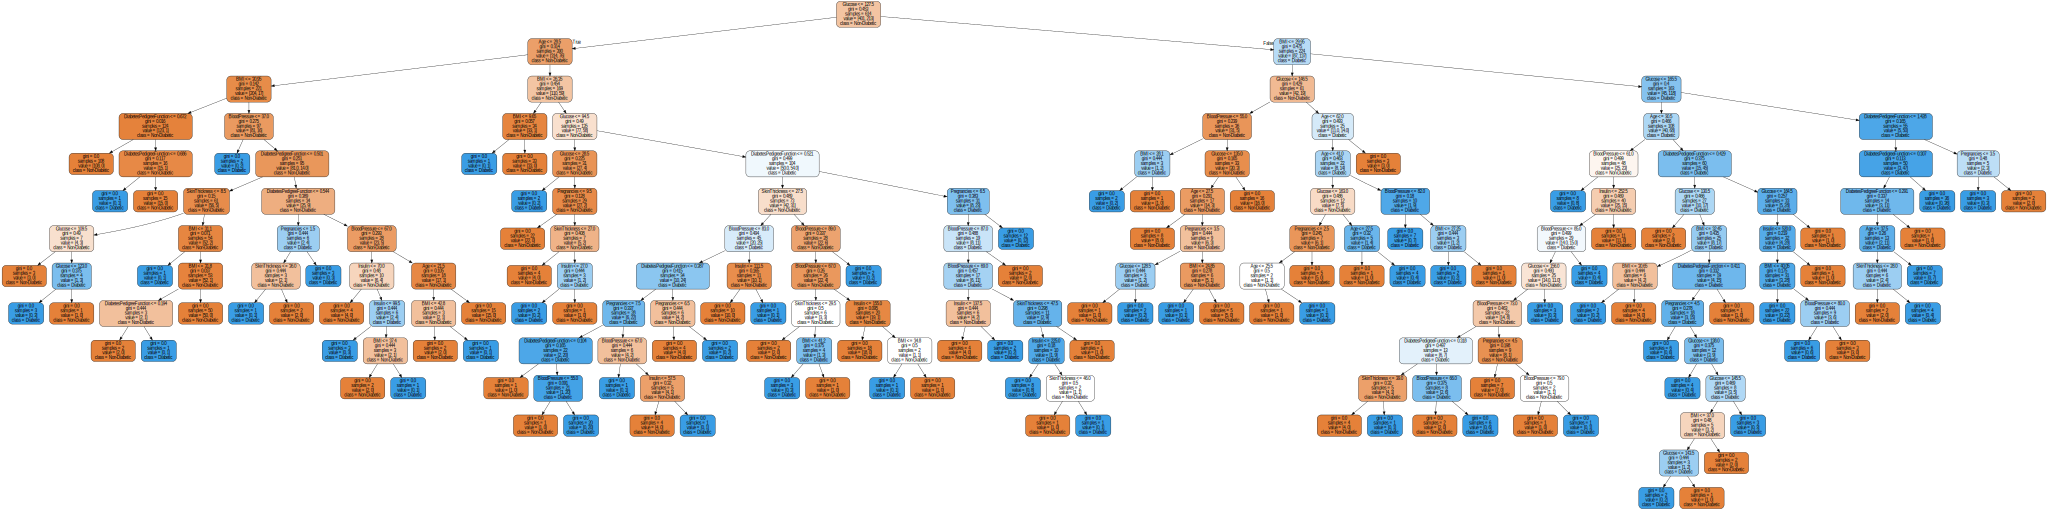

In [66]:
# =====================================================
# 9. TREE VISULIZATION
# =====================================================
from sklearn.tree import export_graphviz
import graphviz

dot_data = export_graphviz(
    model,
    out_file=None,
    feature_names=X.columns,
    class_names=["Non-Diabetic", "Diabetic"],
    filled=True,
    rounded=True
)

graphviz.Source(dot_data)


# =====================================================
# 10. CONCLUSION
# =====================================================
"""
1. The dataset shows a balanced distribution between diabetic and non-diabetic cases.
2. Glucose and BMI are strong indicators of diabetes.
3. The Decision Tree model provides interpretable predictions.
4. Further improvements can be achieved using hyperparameter tuning or ensemble models.


This notebook is suitable for academic, portfolio, and Kaggle publication.
"""